<a href="https://colab.research.google.com/github/crodriguezbay/MLforMkting/blob/main/SegmentacionEncuestaEdML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div >
<img src = "figs/bannerMLMkting.png" />
</div>



Se importan las librerías requeridas:

In [138]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Se pone límite al número de filas a visualizar:

In [139]:
pd.set_option('display.max_rows', 10)

La librería godown permite importar filas desde un link de drive:

In [140]:
import gdown

# Replace 'file_id' with the actual file ID
file_id = '1i2ZKenhNewJvN1cRwYmmlXmpsbBBEJuK'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file (optional: specify output file name)
gdown.download(url, 'Encuesta_forms.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1i2ZKenhNewJvN1cRwYmmlXmpsbBBEJuK
To: /content/Encuesta_forms.xlsx
100%|██████████| 17.9k/17.9k [00:00<00:00, 27.7MB/s]


'Encuesta_forms.xlsx'

Así se importa el primer archivo:

In [141]:
ruta_archivo = 'Encuesta_forms.xlsx'  # Reemplaza con la ruta real
df = pd.read_excel(ruta_archivo)

print(df.head())  # Imprime las primeras filas del DataFrame

   Id          Start time     Completion time      Email  Name  \
0   1 2024-10-31 20:41:23 2024-10-31 20:43:00  anonymous   NaN   
1   2 2024-10-31 20:41:26 2024-10-31 20:43:15  anonymous   NaN   
2   3 2024-10-31 20:41:44 2024-10-31 20:43:23  anonymous   NaN   
3   4 2024-10-31 20:41:26 2024-10-31 20:44:14  anonymous   NaN   
4   5 2024-10-31 20:41:20 2024-10-31 20:44:33  anonymous   NaN   

  Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado  \
0                            1 (En total desacuerdo)                                                                                                                                          
1                                     4 (de acuerdo)                                                                                                                                          
2                             

Intento cambiar los nombres de los encabezados de varias maneras y no lo logré :(

In [142]:
df.columns

Index(['Id', 'Start time', 'Completion time', 'Email', 'Name',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine Learning aplicado al Marketing',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine learning aplicado (a otras ramas diferentes al ma',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero muy útil para mi vida profesional un curso de Machine Learning',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Me siento muy cómodo co

In [143]:
# prompt: cambiar nombre de columnas en dataframe

new_column_names = {
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado': 'ConocimientoAvanzadoML',
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine Learning aplicado al Marketing': 'InteresAprenderMLMkting',
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine learning aplicado (a otras ramas diferentes al ma': 'InteresAprenderMLOtrasRamas',
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero muy útil para mi vida profesional un curso de Machine Learning': 'UtilidadProfCursoML',
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Me siento muy cómodo con el aprendizaje en línea (virtual)': 'ComodidadAprendizajeVirtual',
    'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo experiencia en conceptos y librerías de programación de Python': 'ExperienciaPython',
    'Si tienes interés en otra rama del Machine Learning aplicado (diferentes al marketing), por favor indicanos en que tema te gustaría que tuvera énfasis un curso de Machine Learning aplicado': 'OtraRamaInteresML',
    'Cuál es tu objetivo principal para tomar un curso de Machine Learning': 'ObjetivoAprenderML',
    'Si respondiste otro en la pregunta 3, por favor indicanos cuál sería su objetivo principal para tomar un curso de Machine Learning': 'TxOtroObjetivoAprenderML',
    'Por favor indicanos el orden de preferencia que tendría para ti las siguientes opciones de soporte durante el curso:': 'OrdenPreferenciaOpcionSoporte',

    # Add more mappings as needed
}

df1 = df.rename(columns=new_column_names)

print(df1.head())  # Print the DataFrame with new column names

   Id          Start time     Completion time      Email  Name  \
0   1 2024-10-31 20:41:23 2024-10-31 20:43:00  anonymous   NaN   
1   2 2024-10-31 20:41:26 2024-10-31 20:43:15  anonymous   NaN   
2   3 2024-10-31 20:41:44 2024-10-31 20:43:23  anonymous   NaN   
3   4 2024-10-31 20:41:26 2024-10-31 20:44:14  anonymous   NaN   
4   5 2024-10-31 20:41:20 2024-10-31 20:44:33  anonymous   NaN   

  Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado  \
0                            1 (En total desacuerdo)                                                                                                                                          
1                                     4 (de acuerdo)                                                                                                                                          
2                             

In [144]:
df1.columns

Index(['Id', 'Start time', 'Completion time', 'Email', 'Name',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine Learning aplicado al Marketing',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Tengo alto interés en aprender Machine learning aplicado (a otras ramas diferentes al ma',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero muy útil para mi vida profesional un curso de Machine Learning',
       'Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Me siento muy cómodo co

In [145]:
# prompt: cambiar nombre de columnas en dataframe

new_column_names1 = {
    0: 'ConocimientoAvanzadoML',
    1: 'InteresAprenderMLMkting',
    2: 'InteresAprenderMLOtrasRamas',
    3: 'UtilidadProfCursoML',
    4: 'ComodidadAprendizajeVirtual',
    5: 'ExperienciaPython',
    6: 'OtraRamaInteresML',
    7: 'ObjetivoAprenderML',
    8: 'TxOtroObjetivoAprenderML',
    9: 'OrdenPreferenciaOpcionSoporte',

    # Add more mappings as needed
}


df.columns = [new_column_names.get(i, df.columns[i]) for i in range(len(df.columns))]
#df1 = df.rename(columns=new_column_names)

print(df.head())  # Print the DataFrame with new column names

   Id          Start time     Completion time      Email  Name  \
0   1 2024-10-31 20:41:23 2024-10-31 20:43:00  anonymous   NaN   
1   2 2024-10-31 20:41:26 2024-10-31 20:43:15  anonymous   NaN   
2   3 2024-10-31 20:41:44 2024-10-31 20:43:23  anonymous   NaN   
3   4 2024-10-31 20:41:26 2024-10-31 20:44:14  anonymous   NaN   
4   5 2024-10-31 20:41:20 2024-10-31 20:44:33  anonymous   NaN   

  Marca de 1 a 5 según estés completamente de acuerdo con la afirmación (5) o, no estes para nada de acuerdo (1) .Considero que tengo un nivel de conocimiento en Machine Learning avanzado  \
0                            1 (En total desacuerdo)                                                                                                                                          
1                                     4 (de acuerdo)                                                                                                                                          
2                             

Decidí entonces arreglarlo desde el excel para continuar procesando el archivo:

In [146]:

# Replace 'file_id' with the actual file ID
file_id = '1GGb6wmB5oEesOitkFO6RuekwPrRkpkxd'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file (optional: specify output file name)
gdown.download(url, 'Encuesta_forms_Ajustada.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GGb6wmB5oEesOitkFO6RuekwPrRkpkxd
To: /content/Encuesta_forms_Ajustada.xlsx
100%|██████████| 17.6k/17.6k [00:00<00:00, 25.5MB/s]


'Encuesta_forms_Ajustada.xlsx'

In [147]:
ruta_archivo = 'Encuesta_forms_Ajustada.xlsx'  # Reemplaza con la ruta real
df = pd.read_excel(ruta_archivo)

print(df.head())  # Imprime las primeras filas del DataFrame

   Id          Start time     Completion time      Email  Name  \
0   1 2024-10-31 20:41:23 2024-10-31 20:43:00  anonymous   NaN   
1   2 2024-10-31 20:41:26 2024-10-31 20:43:15  anonymous   NaN   
2   3 2024-10-31 20:41:44 2024-10-31 20:43:23  anonymous   NaN   
3   4 2024-10-31 20:41:26 2024-10-31 20:44:14  anonymous   NaN   
4   5 2024-10-31 20:41:20 2024-10-31 20:44:33  anonymous   NaN   

               ConocimientoMLAvanzado            InteresMLMkting  \
0             1 (En total desacuerdo)  5 (Totalmente de acuerdo)   
1                      4 (de acuerdo)  5 (Totalmente de acuerdo)   
2                   2 (En desacuerdo)             4 (de acuerdo)   
3  3 (Ni de acuerdo ni en desacuerdo)  5 (Totalmente de acuerdo)   
4                      4 (de acuerdo)  5 (Totalmente de acuerdo)   

                    InteresOtrasRamas       UtilidadProfMLMkting  \
0                      4 (de acuerdo)  5 (Totalmente de acuerdo)   
1  3 (Ni de acuerdo ni en desacuerdo)  5 (Totalmente de ac

Observo que las variables numéricas no están depuradas y se necesita eliminar texto:

In [148]:
df.columns

Index(['Id', 'Start time', 'Completion time', 'Email', 'Name',
       'ConocimientoMLAvanzado', 'InteresMLMkting', 'InteresOtrasRamas',
       'UtilidadProfMLMkting', 'ComodidadAprendizajeVirtual',
       'ProbabilidadCursoFuturoML', 'ExperienciaPython',
       'OtraRamaInterésMLAplicado', 'ObjetivoCursoML',
       'OtroObjetivoCursoML(TxAbierto)', 'OrdenPreferenciaOpcionesSoporte',
       'Escolaridad'],
      dtype='object')

Elimino el texto manteniendo solo el primer caracter de las variables numéricas:

In [149]:
df['ConocimientoMLAvanzado'] = df['ConocimientoMLAvanzado'].str[0]

df['ConocimientoMLAvanzado']

,ConocimientoMLAvanzado
0,1
1,4
2,2
3,3
4,4
...,...
49,2
50,1
51,2
52,2


In [150]:


columnas_a_modificar = ['InteresMLMkting', 'InteresOtrasRamas',
       'UtilidadProfMLMkting', 'ComodidadAprendizajeVirtual',
       'ProbabilidadCursoFuturoML', 'ExperienciaPython']

for columna in columnas_a_modificar:
    df[columna] = df[columna].str[0]

In [151]:

df

,Id,Start time,Completion time,Email,Name,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,ProbabilidadCursoFuturoML,ExperienciaPython,OtraRamaInterésMLAplicado,ObjetivoCursoML,OtroObjetivoCursoML(TxAbierto),OrdenPreferenciaOpcionesSoporte,Escolaridad
0,1,2024-10-31 20:41:23,2024-10-31 20:43:00,anonymous,NaN,1,5,4,5,5,5,1,Ventas,Mejorar habilidades en su trabajo actual,NaN,Recursos adicionales;Tutores disponibles;Foros...,Profesional
1,2,2024-10-31 20:41:26,2024-10-31 20:43:15,anonymous,NaN,4,5,3,5,5,5,4,NaN,Aplicar Machine Learning a proyecto personal,Predicción,Tutores disponibles;Recursos adicionales;Foros...,Maestría
2,3,2024-10-31 20:41:44,2024-10-31 20:43:23,anonymous,NaN,2,4,3,4,4,4,1,Data storytelling,Cambiar de carrera,NaN,Recursos adicionales;Tutores disponibles;Foros...,Profesional
3,4,2024-10-31 20:41:26,2024-10-31 20:44:14,anonymous,NaN,3,5,4,4,4,4,2,Finanzas,Otro,Ampliar conocimientos,Recursos adicionales;Foros de discusión;Tutore...,Maestría
4,5,2024-10-31 20:41:20,2024-10-31 20:44:33,anonymous,NaN,4,5,3,5,4,3,3,Operaciones,Aplicar Machine Learning a proyecto personal,NaN,Tutores disponibles;Recursos adicionales;Foros...,Maestría
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,29,2024-11-01 10:19:59,2024-11-01 10:23:13,anonymous,NaN,2,4,4,4,4,4,4,Siento especial interés por el tema,Mejorar habilidades en su trabajo actual,No,Foros de discusión;Tutores disponibles;Recurso...,Maestría
50,47,2024-11-02 15:57:14,2024-11-02 15:58:40,anonymous,NaN,1,4,4,4,4,4,1,NaN,Aplicar Machine Learning a proyecto personal,NaN,Recursos adicionales;Tutores disponibles;Foros...,Maestría
51,50,2024-11-02 17:23:49,2024-11-02 17:24:50,anonymous,NaN,2,4,4,4,4,4,1,NaN,Aplicar Machine Learning a proyecto personal,NaN,Tutores disponibles;Recursos adicionales;Foros...,Maestría
52,53,2024-11-02 20:40:28,2024-11-02 20:42:15,anonymous,NaN,2,5,5,5,5,5,1,NaN,Ninguno,NaN,Recursos adicionales;Foros de discusión;Tutore...,Maestría


Siguen apareciendo como texto, entonces debo convertirlas en números:

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               54 non-null     int64         
 1   Start time                       54 non-null     datetime64[ns]
 2   Completion time                  54 non-null     datetime64[ns]
 3   Email                            54 non-null     object        
 4   Name                             0 non-null      float64       
 5   ConocimientoMLAvanzado           54 non-null     object        
 6   InteresMLMkting                  54 non-null     object        
 7   InteresOtrasRamas                54 non-null     object        
 8   UtilidadProfMLMkting             54 non-null     object        
 9   ComodidadAprendizajeVirtual      54 non-null     object        
 10  ProbabilidadCursoFuturoML        54 non-null     object        


In [153]:
df['ConocimientoMLAvanzado'] = df['ConocimientoMLAvanzado'].astype(int)
df['InteresMLMkting'] = df['InteresMLMkting'].astype(int)
df['InteresOtrasRamas'] = df['InteresOtrasRamas'].astype(int)
df['UtilidadProfMLMkting'] = df['UtilidadProfMLMkting'].astype(int)
df['ComodidadAprendizajeVirtual'] = df['ComodidadAprendizajeVirtual'].astype(int)
df['ProbabilidadCursoFuturoML'] = df['ProbabilidadCursoFuturoML'].astype(int)
df['ExperienciaPython'] = df['ExperienciaPython'].astype(int)

df['OtraRamaInterésMLAplicado'] = df['OtraRamaInterésMLAplicado'].astype(str)
df['ObjetivoCursoML'] = df['ObjetivoCursoML'].astype(str)
df['OtroObjetivoCursoML(TxAbierto)'] = df['OtroObjetivoCursoML(TxAbierto)'].astype(str)
df['OrdenPreferenciaOpcionesSoporte'] = df['OrdenPreferenciaOpcionesSoporte'].astype(str)
df['Escolaridad'] = df['Escolaridad'].astype(str)

Ahora debo tratar las variables categóricas usando la función get_dummies:

In [154]:
df_dummies = pd.get_dummies(df, columns=['ObjetivoCursoML'], prefix='Cat')

df_dummies

,Id,Start time,Completion time,Email,Name,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,...,ExperienciaPython,OtraRamaInterésMLAplicado,OtroObjetivoCursoML(TxAbierto),OrdenPreferenciaOpcionesSoporte,Escolaridad,Cat_Aplicar Machine Learning a proyecto personal,Cat_Cambiar de carrera,Cat_Mejorar habilidades en su trabajo actual,Cat_Ninguno,Cat_Otro
0,1,2024-10-31 20:41:23,2024-10-31 20:43:00,anonymous,NaN,1,5,4,5,5,...,1,Ventas,nan,Recursos adicionales;Tutores disponibles;Foros...,Profesional,False,False,True,False,False
1,2,2024-10-31 20:41:26,2024-10-31 20:43:15,anonymous,NaN,4,5,3,5,5,...,4,nan,Predicción,Tutores disponibles;Recursos adicionales;Foros...,Maestría,True,False,False,False,False
2,3,2024-10-31 20:41:44,2024-10-31 20:43:23,anonymous,NaN,2,4,3,4,4,...,1,Data storytelling,nan,Recursos adicionales;Tutores disponibles;Foros...,Profesional,False,True,False,False,False
3,4,2024-10-31 20:41:26,2024-10-31 20:44:14,anonymous,NaN,3,5,4,4,4,...,2,Finanzas,Ampliar conocimientos,Recursos adicionales;Foros de discusión;Tutore...,Maestría,False,False,False,False,True
4,5,2024-10-31 20:41:20,2024-10-31 20:44:33,anonymous,NaN,4,5,3,5,4,...,3,Operaciones,nan,Tutores disponibles;Recursos adicionales;Foros...,Maestría,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,29,2024-11-01 10:19:59,2024-11-01 10:23:13,anonymous,NaN,2,4,4,4,4,...,4,Siento especial interés por el tema,No,Foros de discusión;Tutores disponibles;Recurso...,Maestría,False,False,True,False,False
50,47,2024-11-02 15:57:14,2024-11-02 15:58:40,anonymous,NaN,1,4,4,4,4,...,1,nan,nan,Recursos adicionales;Tutores disponibles;Foros...,Maestría,True,False,False,False,False
51,50,2024-11-02 17:23:49,2024-11-02 17:24:50,anonymous,NaN,2,4,4,4,4,...,1,nan,nan,Tutores disponibles;Recursos adicionales;Foros...,Maestría,True,False,False,False,False
52,53,2024-11-02 20:40:28,2024-11-02 20:42:15,anonymous,NaN,2,5,5,5,5,...,1,nan,nan,Recursos adicionales;Foros de discusión;Tutore...,Maestría,False,False,False,True,False


Acorto los nombres de las nuevas variables dummies creadas:

In [155]:
new_column_names = {
    'Cat_Aplicar Machine Learning a proyecto personal': 'Cat_ProyPersonal',
    'Cat_Cambiar de carrera': 'Cat_Cambio_Carrera',
    'Cat_Mejorar habilidades en su trabajo actual': 'Cat_MejHabTrabActual',
    'Cat_Aplicar Machine Learning a proyecto personal': 'Cat_ProyPersonal',

    # Add more mappings as needed
}

df_dummies = df_dummies.rename(columns=new_column_names)

Y también lo convierto en enteros:

In [156]:
df_dummies['Cat_ProyPersonal'] = df_dummies['Cat_ProyPersonal'].astype(int)
df_dummies['Cat_Cambio_Carrera'] = df_dummies['Cat_Cambio_Carrera'].astype(int)
df_dummies['Cat_MejHabTrabActual'] = df_dummies['Cat_MejHabTrabActual'].astype(int)
df_dummies['Cat_ProyPersonal'] = df_dummies['Cat_ProyPersonal'].astype(int)
df_dummies['Cat_Ninguno']=df_dummies['Cat_Ninguno'].astype(int)
df_dummies['Cat_Otro']=df_dummies['Cat_Otro'].astype(int)
df_dummies

,Id,Start time,Completion time,Email,Name,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,...,ExperienciaPython,OtraRamaInterésMLAplicado,OtroObjetivoCursoML(TxAbierto),OrdenPreferenciaOpcionesSoporte,Escolaridad,Cat_ProyPersonal,Cat_Cambio_Carrera,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro
0,1,2024-10-31 20:41:23,2024-10-31 20:43:00,anonymous,NaN,1,5,4,5,5,...,1,Ventas,nan,Recursos adicionales;Tutores disponibles;Foros...,Profesional,0,0,1,0,0
1,2,2024-10-31 20:41:26,2024-10-31 20:43:15,anonymous,NaN,4,5,3,5,5,...,4,nan,Predicción,Tutores disponibles;Recursos adicionales;Foros...,Maestría,1,0,0,0,0
2,3,2024-10-31 20:41:44,2024-10-31 20:43:23,anonymous,NaN,2,4,3,4,4,...,1,Data storytelling,nan,Recursos adicionales;Tutores disponibles;Foros...,Profesional,0,1,0,0,0
3,4,2024-10-31 20:41:26,2024-10-31 20:44:14,anonymous,NaN,3,5,4,4,4,...,2,Finanzas,Ampliar conocimientos,Recursos adicionales;Foros de discusión;Tutore...,Maestría,0,0,0,0,1
4,5,2024-10-31 20:41:20,2024-10-31 20:44:33,anonymous,NaN,4,5,3,5,4,...,3,Operaciones,nan,Tutores disponibles;Recursos adicionales;Foros...,Maestría,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,29,2024-11-01 10:19:59,2024-11-01 10:23:13,anonymous,NaN,2,4,4,4,4,...,4,Siento especial interés por el tema,No,Foros de discusión;Tutores disponibles;Recurso...,Maestría,0,0,1,0,0
50,47,2024-11-02 15:57:14,2024-11-02 15:58:40,anonymous,NaN,1,4,4,4,4,...,1,nan,nan,Recursos adicionales;Tutores disponibles;Foros...,Maestría,1,0,0,0,0
51,50,2024-11-02 17:23:49,2024-11-02 17:24:50,anonymous,NaN,2,4,4,4,4,...,1,nan,nan,Tutores disponibles;Recursos adicionales;Foros...,Maestría,1,0,0,0,0
52,53,2024-11-02 20:40:28,2024-11-02 20:42:15,anonymous,NaN,2,5,5,5,5,...,1,nan,nan,Recursos adicionales;Foros de discusión;Tutore...,Maestría,0,0,0,1,0


In [157]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               54 non-null     int64         
 1   Start time                       54 non-null     datetime64[ns]
 2   Completion time                  54 non-null     datetime64[ns]
 3   Email                            54 non-null     object        
 4   Name                             0 non-null      float64       
 5   ConocimientoMLAvanzado           54 non-null     int64         
 6   InteresMLMkting                  54 non-null     int64         
 7   InteresOtrasRamas                54 non-null     int64         
 8   UtilidadProfMLMkting             54 non-null     int64         
 9   ComodidadAprendizajeVirtual      54 non-null     int64         
 10  ProbabilidadCursoFuturoML        54 non-null     int64         


Por un error en la generación de la encuesta, no dejé obligatoria la priorización. Eso me generó un ";" al final que debo eliminar. Después si separó la columna con esa variable en 3.

In [158]:
df_dummies['OrdenPreferenciaOpcionesSoporte'] = df['OrdenPreferenciaOpcionesSoporte'].str[:-1]

df_dummies[['Opcion1', 'Opcion2', 'Opcion3']] = df_dummies['OrdenPreferenciaOpcionesSoporte'].str.split(';', expand=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               54 non-null     int64         
 1   Start time                       54 non-null     datetime64[ns]
 2   Completion time                  54 non-null     datetime64[ns]
 3   Email                            54 non-null     object        
 4   Name                             0 non-null      float64       
 5   ConocimientoMLAvanzado           54 non-null     int64         
 6   InteresMLMkting                  54 non-null     int64         
 7   InteresOtrasRamas                54 non-null     int64         
 8   UtilidadProfMLMkting             54 non-null     int64         
 9   ComodidadAprendizajeVirtual      54 non-null     int64         
 10  ProbabilidadCursoFuturoML        54 non-null     int64         


Le asigno un puntaje a la priorización y dejo en 3 columnas los puntajes de acuerdo al orden de priorización asignado.

In [159]:
valoresbuscados=['Recursos adicionales','Tutores disponibles','Foros de discusión']

for valor in valoresbuscados:
    # Define the string to search for
    search_string = valor
    # Define the conditions
    conditions = [
    df_dummies['Opcion1'].str.contains(search_string, na=False),
    df_dummies['Opcion2'].str.contains(search_string, na=False),
    df_dummies['Opcion3'].str.contains(search_string, na=False)]
    # Define the corresponding values
    values = [3, 2, 1]
    # Create the new column with values based on the conditions
    df_dummies['puntaje'+ valor] = np.select(conditions, values, default=0)

df_dummies

,Id,Start time,Completion time,Email,Name,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,...,Cat_Cambio_Carrera,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro,Opcion1,Opcion2,Opcion3,puntajeRecursos adicionales,puntajeTutores disponibles,puntajeForos de discusión
0,1,2024-10-31 20:41:23,2024-10-31 20:43:00,anonymous,NaN,1,5,4,5,5,...,0,1,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1
1,2,2024-10-31 20:41:26,2024-10-31 20:43:15,anonymous,NaN,4,5,3,5,5,...,0,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1
2,3,2024-10-31 20:41:44,2024-10-31 20:43:23,anonymous,NaN,2,4,3,4,4,...,1,0,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1
3,4,2024-10-31 20:41:26,2024-10-31 20:44:14,anonymous,NaN,3,5,4,4,4,...,0,0,0,1,Recursos adicionales,Foros de discusión,Tutores disponibles,3,1,2
4,5,2024-10-31 20:41:20,2024-10-31 20:44:33,anonymous,NaN,4,5,3,5,4,...,0,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,29,2024-11-01 10:19:59,2024-11-01 10:23:13,anonymous,NaN,2,4,4,4,4,...,0,1,0,0,Foros de discusión,Tutores disponibles,Recursos adicionales,1,2,3
50,47,2024-11-02 15:57:14,2024-11-02 15:58:40,anonymous,NaN,1,4,4,4,4,...,0,0,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1
51,50,2024-11-02 17:23:49,2024-11-02 17:24:50,anonymous,NaN,2,4,4,4,4,...,0,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1
52,53,2024-11-02 20:40:28,2024-11-02 20:42:15,anonymous,NaN,2,5,5,5,5,...,0,0,1,0,Recursos adicionales,Foros de discusión,Tutores disponibles,3,1,2


In [160]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Id                               54 non-null     int64         
 1   Start time                       54 non-null     datetime64[ns]
 2   Completion time                  54 non-null     datetime64[ns]
 3   Email                            54 non-null     object        
 4   Name                             0 non-null      float64       
 5   ConocimientoMLAvanzado           54 non-null     int64         
 6   InteresMLMkting                  54 non-null     int64         
 7   InteresOtrasRamas                54 non-null     int64         
 8   UtilidadProfMLMkting             54 non-null     int64         
 9   ComodidadAprendizajeVirtual      54 non-null     int64         
 10  ProbabilidadCursoFuturoML        54 non-null     int64         


Ahora le doy manejo a las variable ordinal de escolaridad, reemplazandola con un puntaje acorde con el nivel de escolaridad:

In [161]:
category_to_value = {'Técnico/tecnólogo': 1, 'Profesional':2 , 'Maestría': 3, 'Doctorado': 4}

# Create a new column with values according to the category
df_dummies['ValorEscolaridad'] = df_dummies['Escolaridad'].map(category_to_value)
df_dummies

,Id,Start time,Completion time,Email,Name,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,...,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro,Opcion1,Opcion2,Opcion3,puntajeRecursos adicionales,puntajeTutores disponibles,puntajeForos de discusión,ValorEscolaridad
0,1,2024-10-31 20:41:23,2024-10-31 20:43:00,anonymous,NaN,1,5,4,5,5,...,1,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1,2
1,2,2024-10-31 20:41:26,2024-10-31 20:43:15,anonymous,NaN,4,5,3,5,5,...,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1,3
2,3,2024-10-31 20:41:44,2024-10-31 20:43:23,anonymous,NaN,2,4,3,4,4,...,0,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1,2
3,4,2024-10-31 20:41:26,2024-10-31 20:44:14,anonymous,NaN,3,5,4,4,4,...,0,0,1,Recursos adicionales,Foros de discusión,Tutores disponibles,3,1,2,3
4,5,2024-10-31 20:41:20,2024-10-31 20:44:33,anonymous,NaN,4,5,3,5,4,...,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,29,2024-11-01 10:19:59,2024-11-01 10:23:13,anonymous,NaN,2,4,4,4,4,...,1,0,0,Foros de discusión,Tutores disponibles,Recursos adicionales,1,2,3,3
50,47,2024-11-02 15:57:14,2024-11-02 15:58:40,anonymous,NaN,1,4,4,4,4,...,0,0,0,Recursos adicionales,Tutores disponibles,Foros de discusión,3,2,1,3
51,50,2024-11-02 17:23:49,2024-11-02 17:24:50,anonymous,NaN,2,4,4,4,4,...,0,0,0,Tutores disponibles,Recursos adicionales,Foros de discusión,2,3,1,3
52,53,2024-11-02 20:40:28,2024-11-02 20:42:15,anonymous,NaN,2,5,5,5,5,...,0,1,0,Recursos adicionales,Foros de discusión,Tutores disponibles,3,1,2,3


In [162]:
df_dummies.columns

Index(['Id', 'Start time', 'Completion time', 'Email', 'Name',
       'ConocimientoMLAvanzado', 'InteresMLMkting', 'InteresOtrasRamas',
       'UtilidadProfMLMkting', 'ComodidadAprendizajeVirtual',
       'ProbabilidadCursoFuturoML', 'ExperienciaPython',
       'OtraRamaInterésMLAplicado', 'OtroObjetivoCursoML(TxAbierto)',
       'OrdenPreferenciaOpcionesSoporte', 'Escolaridad', 'Cat_ProyPersonal',
       'Cat_Cambio_Carrera', 'Cat_MejHabTrabActual', 'Cat_Ninguno', 'Cat_Otro',
       'Opcion1', 'Opcion2', 'Opcion3', 'puntajeRecursos adicionales',
       'puntajeTutores disponibles', 'puntajeForos de discusión',
       'ValorEscolaridad'],
      dtype='object')

Selecciono las variables numéricas para hacer el ejercicio de segmentación:

In [163]:

df_segmentacion=df_dummies[['ConocimientoMLAvanzado', 'InteresMLMkting', 'InteresOtrasRamas',
       'UtilidadProfMLMkting', 'ComodidadAprendizajeVirtual',
       'ProbabilidadCursoFuturoML', 'ExperienciaPython', 'Cat_ProyPersonal',
       'Cat_Cambio_Carrera', 'Cat_MejHabTrabActual', 'Cat_Ninguno', 'Cat_Otro','puntajeRecursos adicionales',
       'puntajeTutores disponibles', 'puntajeForos de discusión','ValorEscolaridad']]

df_segmentacion

,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,UtilidadProfMLMkting,ComodidadAprendizajeVirtual,ProbabilidadCursoFuturoML,ExperienciaPython,Cat_ProyPersonal,Cat_Cambio_Carrera,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro,puntajeRecursos adicionales,puntajeTutores disponibles,puntajeForos de discusión,ValorEscolaridad
0,1,5,4,5,5,5,1,0,0,1,0,0,3,2,1,2
1,4,5,3,5,5,5,4,1,0,0,0,0,2,3,1,3
2,2,4,3,4,4,4,1,0,1,0,0,0,3,2,1,2
3,3,5,4,4,4,4,2,0,0,0,0,1,3,1,2,3
4,4,5,3,5,4,3,3,1,0,0,0,0,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2,4,4,4,4,4,4,0,0,1,0,0,1,2,3,3
50,1,4,4,4,4,4,1,1,0,0,0,0,3,2,1,3
51,2,4,4,4,4,4,1,1,0,0,0,0,2,3,1,3
52,2,5,5,5,5,5,1,0,0,0,1,0,3,1,2,3


Evaluo la correlación entre variables y de ahí se decide eliminar 'UtilidadProfMLMkting'.

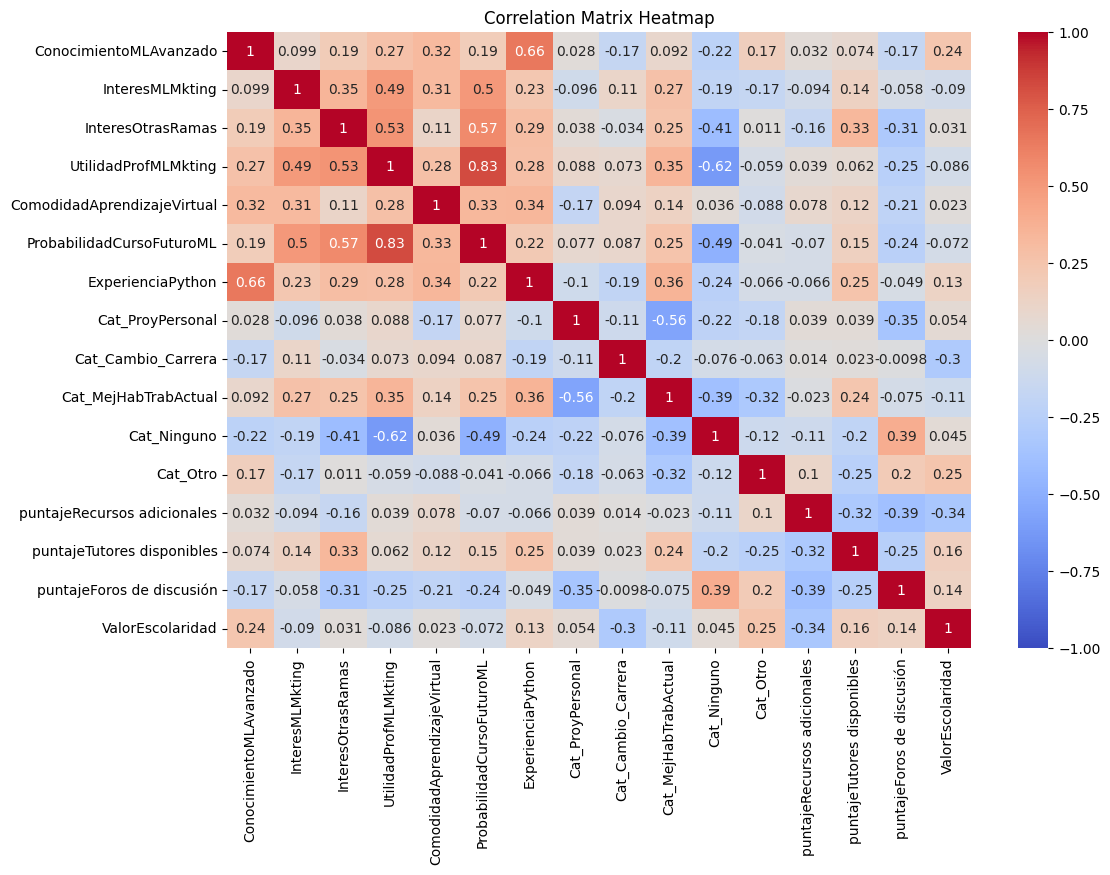

In [164]:
correlation_matrix = df_segmentacion.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [165]:
df_segmentacion = df_segmentacion.drop(columns=['UtilidadProfMLMkting'])
columnas_seg=df_segmentacion.columns

Estandarizo las variables para hacerlas comparables:

In [166]:
# Standardizing numeric data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_segmentacion),columns=columnas_seg)

Aplico las técnicas para decidir el número de clusters:

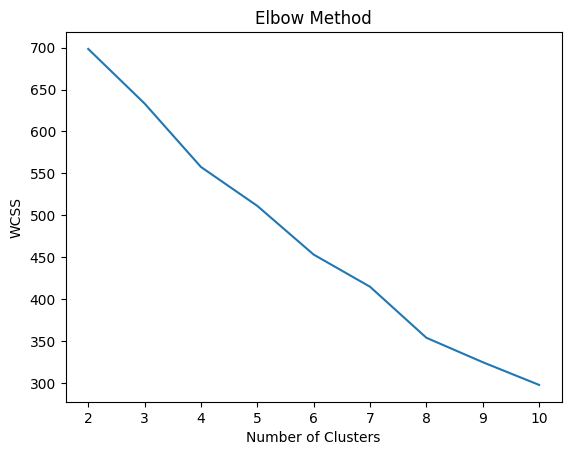

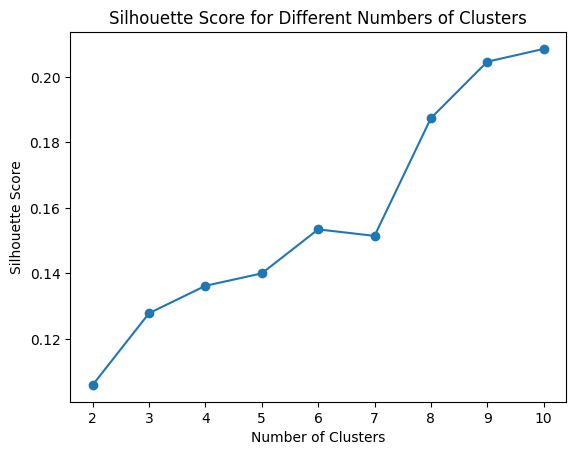

In [167]:
# Choosing the right number of segments using the Elbow Method
wcss = []

# Assuming df_normalized is the normalized data used for clustering
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized)
    cluster_labels = kmeans.fit_predict(df_normalized)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(df_normalized, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [168]:
# Choosing optimal clusters (e.g., from elbow point, k=4 here as an example)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Adding cluster labels to the original dataset
df_segmentacion['Cluster'] = clusters
df_normalized['Cluster'] = clusters

# Interpretation of clusters
cluster_summary = df_segmentacion.groupby('Cluster').mean()
cluster_summaryNormalized=df_normalized.groupby('Cluster').mean()
print(cluster_summary)

         ConocimientoMLAvanzado  InteresMLMkting  InteresOtrasRamas  \
Cluster                                                               
0                        3.6250           4.4375           4.687500   
1                        2.1875           3.4375           4.312500   
2                        1.5000           4.5000           4.000000   
3                        2.2500           3.5000           3.166667   
4                        1.8750           4.5000           4.375000   

         ComodidadAprendizajeVirtual  ProbabilidadCursoFuturoML  \
Cluster                                                           
0                           4.750000                   4.500000   
1                           3.437500                   3.875000   
2                           4.500000                   4.500000   
3                           3.666667                   3.416667   
4                           4.375000                   4.750000   

         ExperienciaPython  Cat_

In [169]:
cluster_summaryTras=cluster_summary.T.round(2)
cluster_normalizedTras=cluster_summaryNormalized.T.round(2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(cluster_summaryTras)

Cluster,0,1,2,3,4
ConocimientoMLAvanzado,3.62,2.19,1.5,2.25,1.88
InteresMLMkting,4.44,3.44,4.5,3.50,4.50
InteresOtrasRamas,4.69,4.31,4.0,3.17,4.38
ComodidadAprendizajeVirtual,4.75,3.44,4.5,3.67,4.38
ProbabilidadCursoFuturoML,4.50,3.88,4.5,3.42,4.75
ExperienciaPython,4.25,1.50,1.0,2.17,2.00
Cat_ProyPersonal,0.19,0.62,0.0,0.00,0.00
Cat_Cambio_Carrera,0.00,0.00,1.0,0.00,0.00
Cat_MejHabTrabActual,0.81,0.25,0.0,0.33,0.75
Cat_Ninguno,0.00,0.00,0.0,0.50,0.12


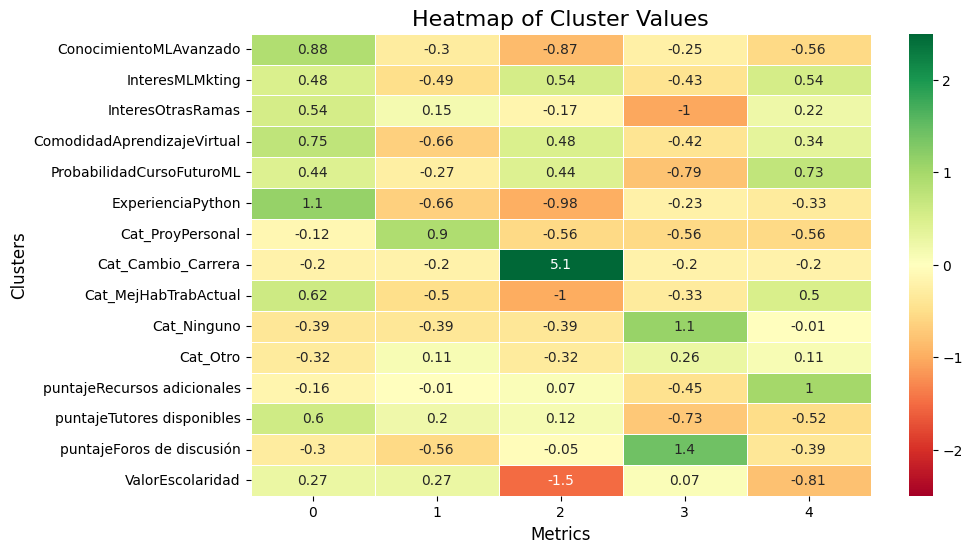

In [170]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_normalizedTras, annot=True, cmap='RdYlGn', vmin=-2.5, vmax=2.5, center=0, linewidths=0.5)

# Customize the title and labels
plt.title('Heatmap of Cluster Values', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Clusters', fontsize=12)

# Show the plot
plt.show()

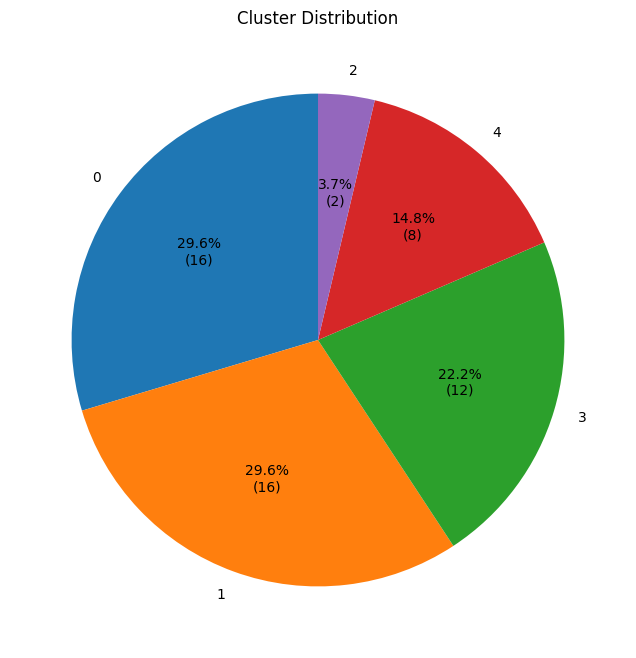

In [171]:
cluster_counts = df_normalized['Cluster'].value_counts()

def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(pct * total / 100)
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=autopct_format(cluster_counts), startangle=90)
plt.title("Cluster Distribution")
plt.show()

In [172]:
df_segmentacion.columns

Index(['ConocimientoMLAvanzado', 'InteresMLMkting', 'InteresOtrasRamas',
       'ComodidadAprendizajeVirtual', 'ProbabilidadCursoFuturoML',
       'ExperienciaPython', 'Cat_ProyPersonal', 'Cat_Cambio_Carrera',
       'Cat_MejHabTrabActual', 'Cat_Ninguno', 'Cat_Otro',
       'puntajeRecursos adicionales', 'puntajeTutores disponibles',
       'puntajeForos de discusión', 'ValorEscolaridad', 'Cluster'],
      dtype='object')

In [173]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(cluster_normalizedTras)

Cluster,0,1,2,3,4
ConocimientoMLAvanzado,0.88,-0.30,-0.87,-0.25,-0.56
InteresMLMkting,0.48,-0.49,0.54,-0.43,0.54
InteresOtrasRamas,0.54,0.15,-0.17,-1.04,0.22
ComodidadAprendizajeVirtual,0.75,-0.66,0.48,-0.42,0.34
ProbabilidadCursoFuturoML,0.44,-0.27,0.44,-0.79,0.73
ExperienciaPython,1.12,-0.66,-0.98,-0.23,-0.33
Cat_ProyPersonal,-0.12,0.90,-0.56,-0.56,-0.56
Cat_Cambio_Carrera,-0.20,-0.20,5.10,-0.20,-0.20
Cat_MejHabTrabActual,0.62,-0.50,-1.00,-0.33,0.50
Cat_Ninguno,-0.39,-0.39,-0.39,1.10,-0.01


In [174]:
df_normalized[df_normalized['Cluster']==2]

,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,ComodidadAprendizajeVirtual,ProbabilidadCursoFuturoML,ExperienciaPython,Cat_ProyPersonal,Cat_Cambio_Carrera,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro,puntajeRecursos adicionales,puntajeTutores disponibles,puntajeForos de discusión,ValorEscolaridad,Cluster
2,-0.458349,0.054153,-1.218544,-0.059655,-0.127000,-0.980648,-0.563093,5.09902,-1.0,-0.385922,-0.319438,1.314257,-0.520865,-0.727505,-1.523138,2
30,-1.283378,1.028908,0.870388,1.014135,1.016001,-0.980648,-0.563093,5.09902,-1.0,-0.385922,-0.319438,-1.175915,0.757622,0.627160,-1.523138,2


In [175]:
df_segmentacion[df_segmentacion['Cluster']==2]

,ConocimientoMLAvanzado,InteresMLMkting,InteresOtrasRamas,ComodidadAprendizajeVirtual,ProbabilidadCursoFuturoML,ExperienciaPython,Cat_ProyPersonal,Cat_Cambio_Carrera,Cat_MejHabTrabActual,Cat_Ninguno,Cat_Otro,puntajeRecursos adicionales,puntajeTutores disponibles,puntajeForos de discusión,ValorEscolaridad,Cluster
2,2,4,3,4,4,1,0,1,0,0,0,3,2,1,2,2
30,1,5,5,5,5,1,0,1,0,0,0,1,3,2,2,2
